In [10]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from modules import DtPre

from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score

In [11]:
titanic_df = pd.read_csv("./csv_data/titanic_train.csv")
y_titanic_df = titanic_df["Survived"]   # 레이블 데이터 셋 추출
X_titanic_df = titanic_df.drop("Survived", axis=1)  # 피쳐 데이터 셋에서 레이블셋은 삭제

X_titanic_df = DtPre.transform_features(X_titanic_df) # 만들어둔 전처리 함수 적용

titanic_test_df = pd.read_csv("./csv_data/titanic_test.csv")
y_titanic_test_df = titanic_test_df["Survived"]   # 레이블 데이터 셋 추출
X_titanic_test_df = titanic_test_df.drop("Survived", axis=1)  # 피쳐 데이터 셋에서 레이블셋은 삭제

X_titanic_test_df = DtPre.transform_features(X_titanic_test_df) # 만들어둔 전처리 함수 적용

In [12]:
titanic_clf = DecisionTreeClassifier(random_state=121)

# X_train, X_test, y_train, y_test = train_test_split(X_titanic_df, y_titanic_df,
#                                                     test_size=0.2, random_state=121)

titanic_clf.fit(X_titanic_df, y_titanic_df)

DecisionTreeClassifier(random_state=121)

Feature Importance : [0.082 0.306 0.271 0.041 0.019 0.208 0.051 0.021]
Pclass : 0.082
Sex : 0.306
Age : 0.271
SibSp : 0.041
Parch : 0.019
Fare : 0.208
Cabin : 0.051
Embarked : 0.021


<AxesSubplot:>

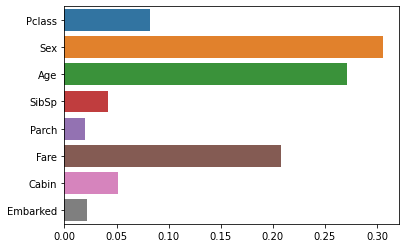

In [13]:
# feature importance 추출
print(f"Feature Importance : {np.round(titanic_clf.feature_importances_, 3)}")

# feature 별 importance 매핑
features = []
for name, value in zip(X_titanic_df.columns, titanic_clf.feature_importances_) :
    print(f"{name} : {value:.3f}")
    features.append({name : np.round(value, 3)})

# feature importance를 column별로 시각화 하기
sns.barplot(x=titanic_clf.feature_importances_, y=X_titanic_df.columns)

In [14]:
titanic_lr = LogisticRegression()

titanic_lr.fit(X_titanic_df, y_titanic_df)

pred_all = titanic_lr.predict(X_titanic_df)

print(np.round(accuracy_score(y_titanic_df, pred_all),3))

0.792


C:\Users\user\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\linear_model\_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [15]:
X_train_feat = X_titanic_df[["Pclass", "Sex", "Age", "Fare", "Cabin"]]
X_test_feat = X_titanic_test_df[["Pclass", "Sex", "Age", "Fare", "Cabin"]]

In [18]:
titanic_lr_feat = LogisticRegression()

titanic_lr_feat.fit(X_train_feat, y_titanic_df)

pred_feat = titanic_lr_feat.predict(X_test_feat)

print(np.round(accuracy_score(y_titanic_test_df, pred_feat),3))

0.95
